# Heart Disease Analysis

# Introduction

The Centers for Disease Control and Prevention (CDC) reports that heart disease is a major cause of death across racial and ethnic groups in the United States. Early detection and prevention are crucial for reducing its impact. In recent years, machine learning techniques have been increasingly applied in medical research to improve the prediction of diseases, including heart disease. This report focuses on analyzing a large dataset containing various health and demographic factors to predict heart disease using several machine learning models, including Random Forest and XGBoost. By identifying the most influential features, such as smoking habits, age, and general health, this analysis aims to provide insights that could potentially enhance early diagnosis and intervention efforts in healthcare.

# Problem Statement

1. What are the key health and demographic factors that significantly influence risk of heart disease?
2. Can machine learning models accurately predict the risk of heart disease based on these factors? Which model will have a greater impact on the outcome?

# Data Overview

In this section, the goal is to perform an initial exploration of the dataset to understand its structure, content, and quality.  This initial step ensures that understand what each variable represents and how it can be used in subsequent analyses. 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the excel file
df = pd.read_csv('heart_2022.csv')

In [3]:
# Check the dimension of data
df.shape

(246022, 40)

In [4]:
# View the fisrt 5 row
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


The dataset contains 246,022 rows and 40 columns. Each row represents an individual respondent, and each column captures either demographic or health-related .

In [5]:
# View summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

## Check Missing Value

In [6]:
# check for missing values
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

The dataset includes 34 categorical variables (e.g., state, sex, and history of heart attack) and 6 numerical variables (e.g., physical health days, sleep hours, and BMI). All columns are complete with no missing values, ensuring a dataset ready for analysis.

## Statistical Summary

In [7]:
# view the statistical summary of numerical variables.
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


The summary statistics show that the average individual experiences around 4-5 days of poor physical and mental health per month, sleeps about 7 hours per day, and has a BMI of approximately 28.5, indicating a tendency toward being overweight. The statistics also highlight potential outliers like sleephours and BMI, which need to further analysis.

# Data Preprocessing

The statistical summary shows that the numerical variables may have some outliers, so use the box plot to explore further and check the relationship between the heart disease.

## Check the Outliers

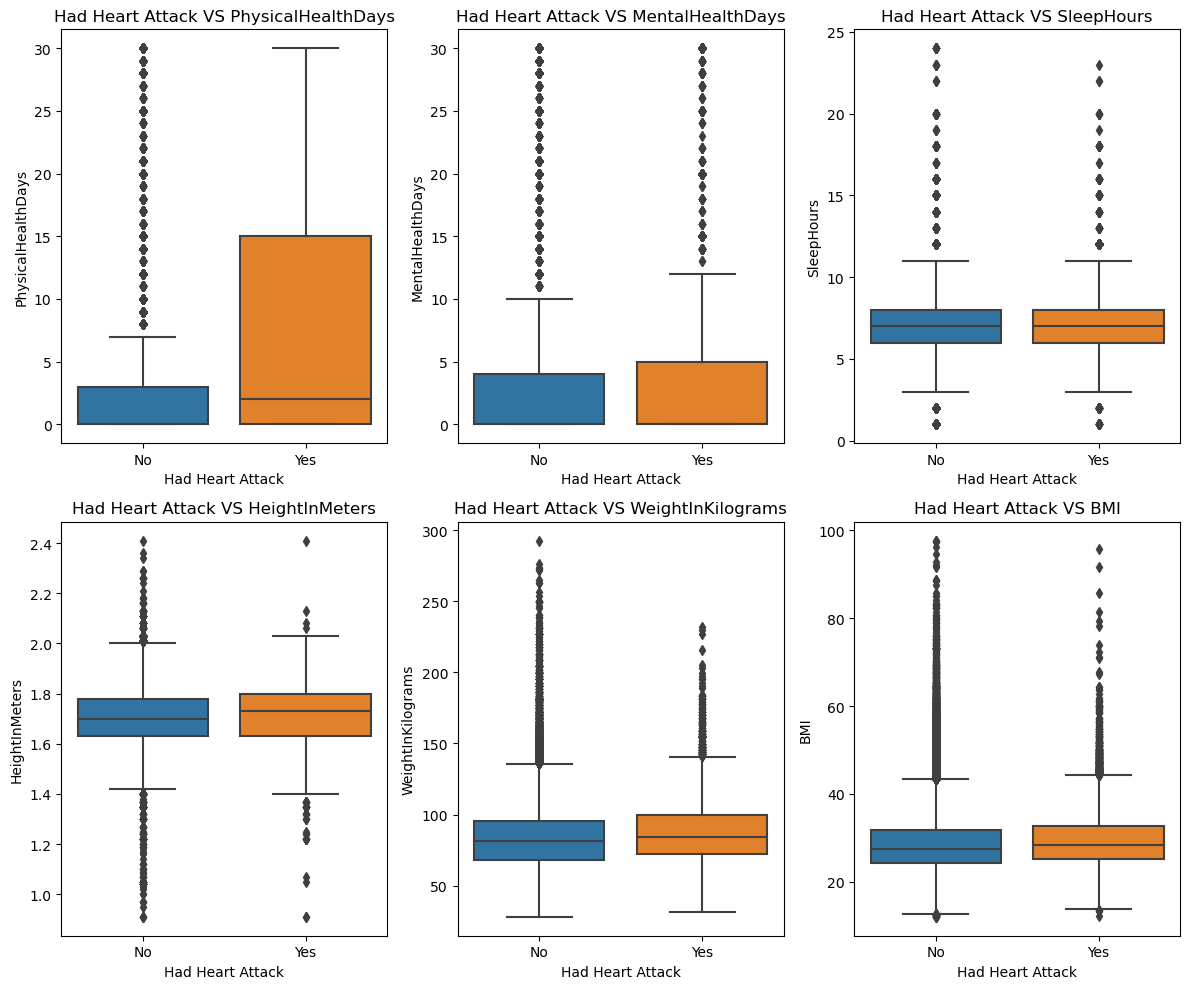

In [8]:
# Use boxplot check the outlier and relationship between continuous variable with heart disease.

numerical_col = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_col, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df['HadHeartAttack'], y=df[col])
    plt.title(f'Had Heart Attack VS {col}')
    plt.xlabel('Had Heart Attack')
    plt.ylabel(f'{col}')

plt.tight_layout()
plt.show()

The box plot clearly shows the existence of outliers in the dataset. However, I would not removed them at this stage because they may contain valuable information that could help predict heart disease.For example, an extreme BMI or a long period of unwell days could be useful predictors. Furthermore, as I may be employing tree models (e.g., Random Forest, Decision Tree, or Support Vector Machines) that are not sensitive to outliers,  I will keep the outliers first to ensure optimal use of all available information.

The graphs also reveal several key relationships between the variables and heart disease. Individuals with heart disease tend to have more days of poor physical and mental health, suggesting a strong positive correlation between these factors and heart disease risk. Higher BMI and weight are also more prevalent among those with heart disease, indicating that obesity is a significant risk factor. However, sleep hours and height show minimal differences between those with and without heart disease, suggesting these variables may have less influence on heart disease outcomes in this dataset.

# Exploratory Data Analysis

The objective of EDA is to gain further insight into the structure and patterns of data, to identify relationships between variables, and to provide guidance on feature selection and modeling decisions for more accurate analysis.

## Distribution of Variables

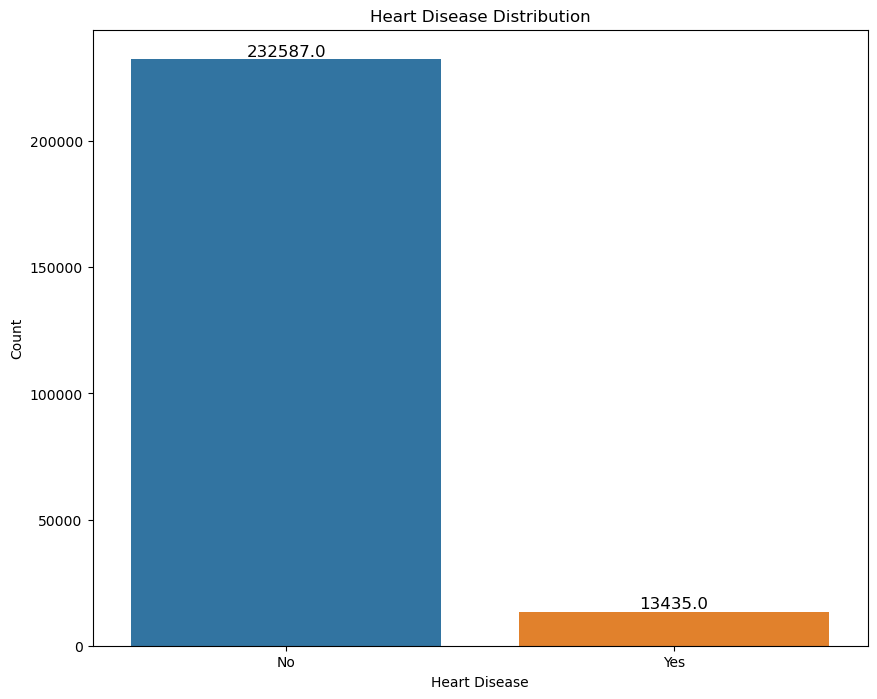

In [9]:
# Distribution of Heart Disease
plt.figure(figsize=(10, 8))
ax =sns.countplot(data=df, x='HadHeartAttack')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=12)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

The chart shows a notable class inbalance, with far more individuals not having heart disease(232,587) compared to those with heart disease(13,435). This inbalance suggests that special technique like resampling will be necessart to ensure model performance.

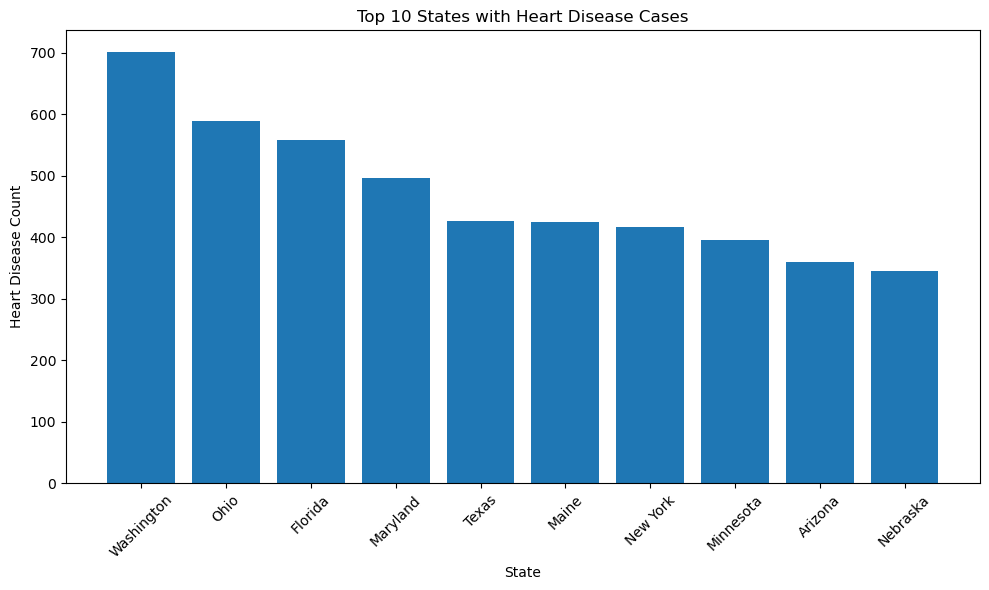

In [10]:
# Top 10 states with heart disease cases
top_10_states = df[df['HadHeartAttack'] == 'Yes'].groupby('State').size().nlargest(10).reset_index()
top_10_states.columns = ['State', 'Heart Disease Count']
plt.figure(figsize=(10, 6))
plt.bar(top_10_states['State'], top_10_states['Heart Disease Count']) 
plt.title('Top 10 States with Heart Disease Cases') 
plt.xlabel('State')
plt.ylabel('Heart Disease Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar plot displays the 10 states with the most heart disease cases. The geographic distribution suggests the presence of regional health or lifestyle factors that may contribute to higher risks in these areas.

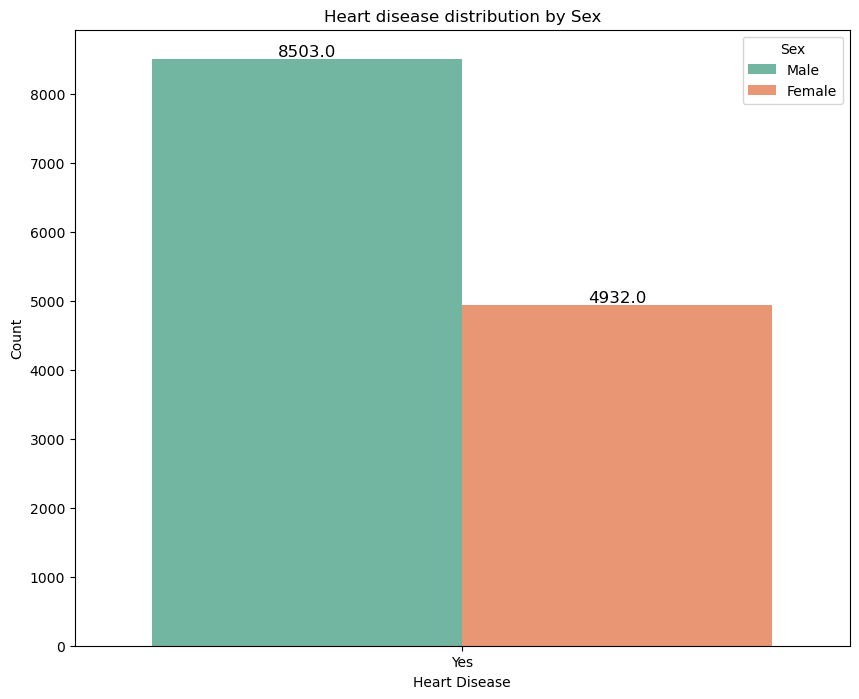

In [11]:
# Heart disease distribution by Sex
df_heart_attack = df[df['HadHeartAttack'] == 'Yes']

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_heart_attack, x='HadHeartAttack', hue='Sex',palette="Set2")


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=12)


plt.title('Heart disease distribution by Sex')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

The chart observes that males have a higher incidence of heart attacks compared to females, which suggests that men generally face a higher risk of heart disease than women.

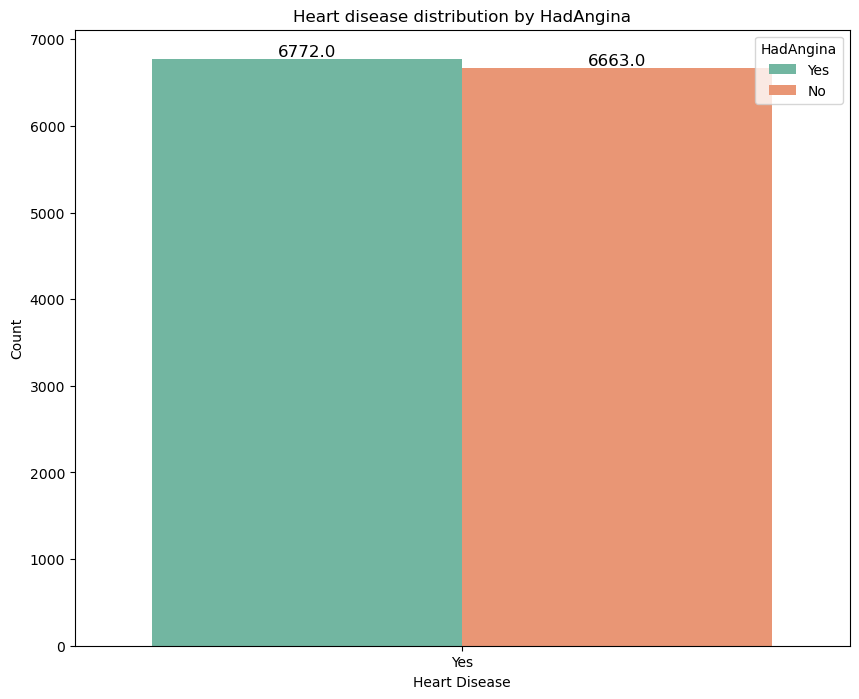

In [12]:
# Heart disease distribution by HadAngina
df_heart_attack = df[df['HadHeartAttack'] == 'Yes']


plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_heart_attack, x='HadHeartAttack', hue='HadAngina',palette="Set2")


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=12)


plt.title('Heart disease distribution by HadAngina')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='HadAngina')
plt.show()

The histogram demonstrates a significant correlation between heart disease and Angina disease, indicating that nearly all individuals with Angina have underlying heart disease.

/var/folders/1n/___ydhn17v530r3q0qsf40cc0000gn/T/ipykernel_51951/2346040786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart_attack['AgeCategory'] = pd.Categorical(df_heart_attack['AgeCategory'], ordered=True)


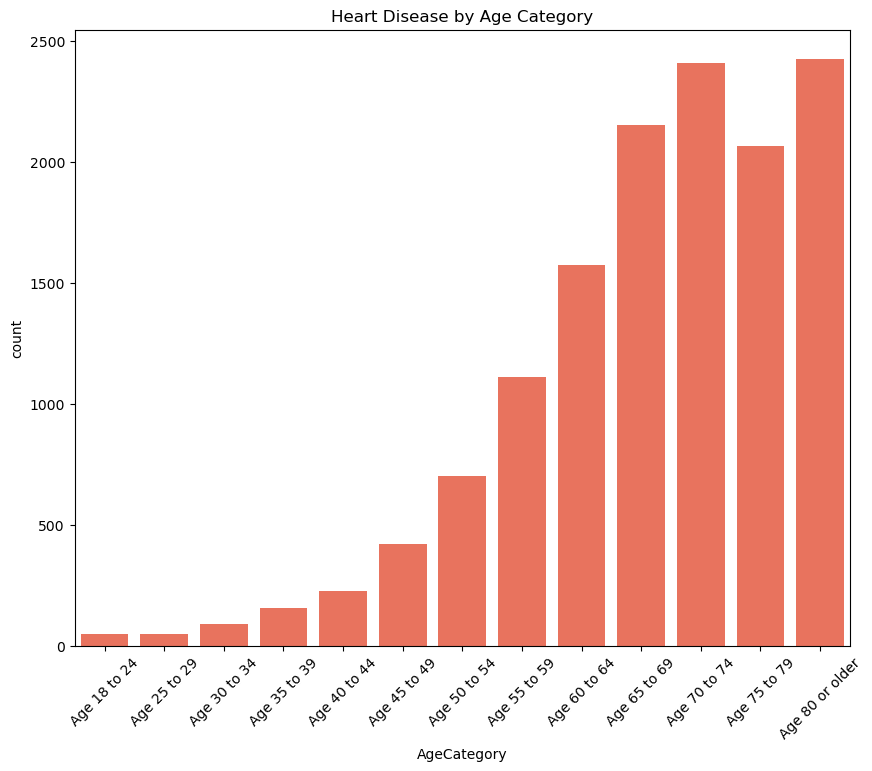

In [13]:
# Age Category vs Heart Disease
df_heart_attack = df[df['HadHeartAttack'] == 'Yes']
df_heart_attack['AgeCategory'] = pd.Categorical(df_heart_attack['AgeCategory'], ordered=True)

plt.figure(figsize=(10, 8))
sns.countplot(x='AgeCategory', data=df_heart_attack, color="#ff6347")
plt.title('Heart Disease by Age Category')
plt.xticks(rotation=45)
plt.show()

The data demonstrate a correlation between age and the risk of heart disease, with the highest incidence observed in older age groups, particularly individuals aged 60 and above. In contrast, younger age groups (e.g., 18-24) have fewer cases of heart attacks, indicating that age is a significant risk factor.

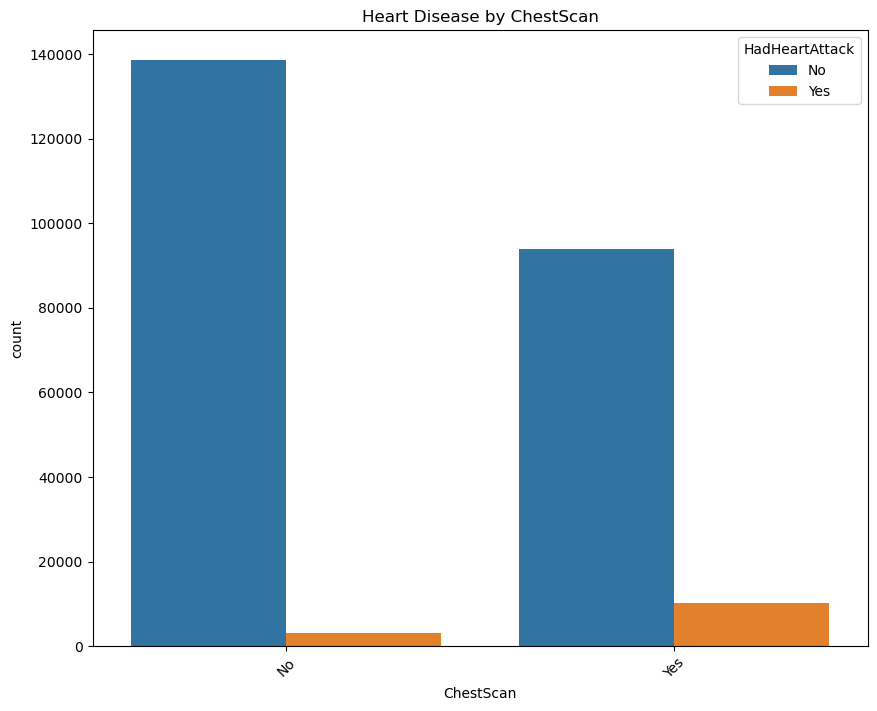

In [14]:
# chestscan vs Heart Disease
plt.figure(figsize=(10, 8))
sns.countplot(x='ChestScan', hue='HadHeartAttack', data=df)
plt.title('Heart Disease by ChestScan')
plt.xticks(rotation=45)
plt.show()



This chart shows the relationship between chest scans and heart disease. The majority of individuals, whether they had a chest scan or not, did not have heart disease. However, among those who had undergone a chest scan, the proportion of individuals with heart disease is higher compared to those without a scan. This suggests that chest scans may be more commonly used for individuals who are at a higher risk of heart disease or have existing symptoms.

## Category Encoding

Utilizing label encoding to convert categorical variables into numerical values, which is necessary because building models require numerical inputs to process the data. 

In [15]:
# use label encoding to convert categorical variable to numerical variable
from sklearn.preprocessing import LabelEncoder
categorical_variab = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for i in categorical_variab:
    df[i] = le.fit_transform(df[i])

# check the data after label encoding
df.head()



,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,4,4.0,0.0,3,1,9.0,3,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
1,0,1,4,0.0,0.0,3,1,6.0,3,0,...,1.78,95.25,30.13,0,0,1,1,2,0,0
2,0,1,4,0.0,0.0,3,0,8.0,1,0,...,1.85,108.86,31.66,1,0,0,1,0,0,2
3,0,0,1,5.0,0.0,3,1,9.0,3,0,...,1.70,90.72,31.32,0,0,1,1,0,0,2
4,0,0,2,3.0,15.0,3,1,5.0,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0


### Correlation Matrix

Since the dataset has a large number of features, I have elected to generate heat maps for correlations exceeding 0.1 and below -0.1. This helps me focus on variables that are strongly correlated with the target variable (HadHeartAttack).  It also helps to simplify the analysis, avoid noise interference, and identifies variables with a greater impact on the model.

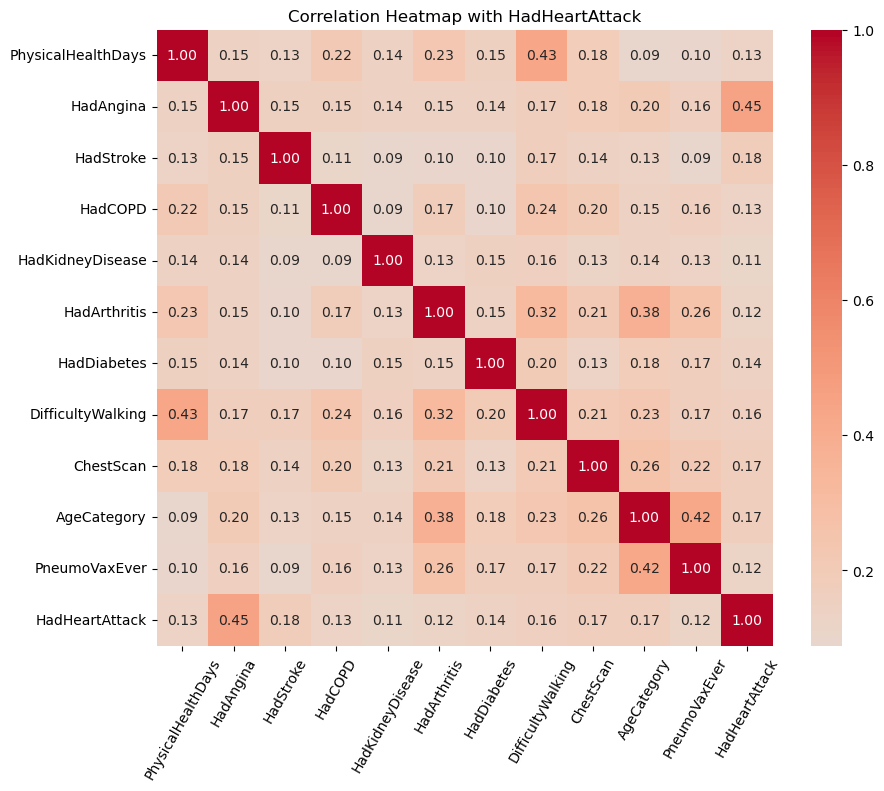

In [16]:
# calculate correlation matrix
correlation_matrix = df.corr()
target_column = 'HadHeartAttack'

# choose columns with correlation greater than 0.1
high_correlation_columns = correlation_matrix[target_column][(correlation_matrix[target_column] > 0.1) | (correlation_matrix[target_column] < -0.1)]

result_columns = high_correlation_columns.index.tolist()
result_columns.remove(target_column)

# plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[result_columns + [target_column]].loc[result_columns + [target_column]], 
             annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True)
plt.title(f'Correlation Heatmap with {target_column}')
plt.xticks(rotation=60)
plt.show()


The heatmap shows the correlation between various features and the target variable HadHeartAttack. The variable HadAngina shows the strongest positive correlation with HadHeartAttack at 0.45, indicating that individuals with angina are more likely to have heart disease. Other variables, such as HadStroke (0.18), ChestScan (0.17), AgeCategory (0.17), and DifficultyWalking (0.16), also show moderate positive correlations, suggesting that these health and demographic factors are associated with heart disease.

## Multicollinearity Checking

I used the Variance Inflation Factor (VIF) to identify potential multicollinearity issues.High VIF values indicate a strong correlation between features which can impact model performance.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF to check multicollinearity
X_correlated = df[result_columns]
vif_data = pd.DataFrame()
vif_data['Feature'] = X_correlated.columns
vif_data['VIF'] = [variance_inflation_factor(X_correlated.values, i) for i in range(X_correlated.shape[1])]

print("Variance Inflation Factor (VIF) values:")
print(vif_data)

# If VIF > 10, the feature is highly correlated with other features


Variance Inflation Factor (VIF) values:
               Feature       VIF
0   PhysicalHealthDays  1.562240
1            HadAngina  1.178393
2            HadStroke  1.109164
3              HadCOPD  1.218260
4     HadKidneyDisease  1.122919
5         HadArthritis  1.973412
6          HadDiabetes  1.307910
7    DifficultyWalking  1.622161
8            ChestScan  1.970098
9          AgeCategory  3.229412
10       PneumoVaxEver  2.147131


The VIF values are all below 5, indicating that there is no significant multicollinearity among the features. The highest VIF is for AgeCategory at 3.23, which suggests some correlation with other variables, but overall, the model should not suffer from serious multicollinearity issues.

# Split the dataset

Due to the class imbalance in the target variable (HadHeartAttack), I applied SMOTE to generate synthetic samples for the minority class. Using SMOTE ensures that the classifier learns from a balanced dataset, improving its ability to accurately classify both classes and reducing bias towards the majority class.

In [18]:
# Split the data into features and target
from sklearn.model_selection import train_test_split
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']


HadHeartAttack
0    232587
1    232587
Name: count, dtype: int64


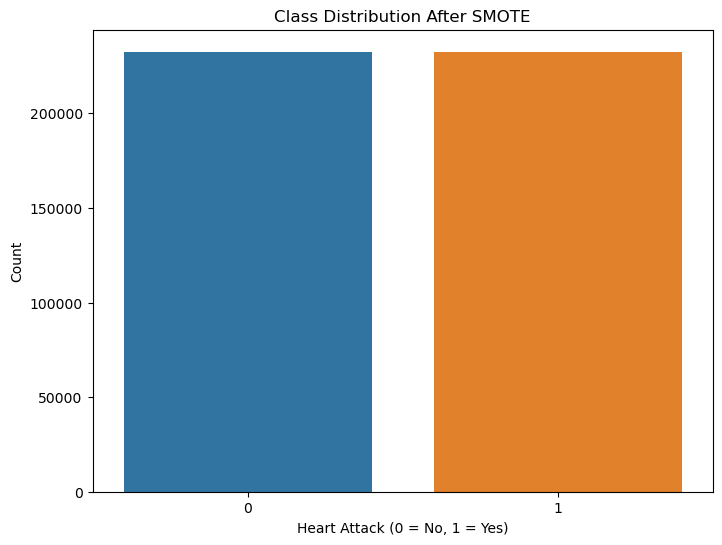

In [19]:
# handle imbalanced data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

# use the plot show the distribution of target variable after resampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Heart Attack (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [20]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# check the shape of training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((372139, 39), (93035, 39), (372139,), (93035,))

From the plot, it can be seen that after resampling, the target variable has become balanced. Both classes—those without heart disease and those with heart disease—now have 232,587 samples each, ensuring equal representation in the dataset.


# Modeling

## Random Forest Classifier

I first used Random Forest for modeling because it is highly effective at handling large dataset without needing feature scaling. Additionally, Random Forest can provide valuable insights into feature importance, which can guide feature selection for further modeling with other algorithms


In [21]:
# build random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Random Forest Model Evaluation

In [22]:
y_pred = random_forest.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9575966034288171
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     46585
           1       0.96      0.96      0.96     46450

    accuracy                           0.96     93035
   macro avg       0.96      0.96      0.96     93035
weighted avg       0.96      0.96      0.96     93035



The Random Forest model reached an accuracy of 95.76%, demonstrating strong performance. Both precision and recall were 0.96 for each class, indicating that the model accurately predicted 96% of true positives and negatives. High precision means that the model has fewer false positives for predicting heart disease positive samples (i.e. people who actually have heart disease). High recall means that the model also misses few heart disease patients. In a medical context, high recall is particular importance, as missed reports may prevent patients from receiving timely treatment.

The F1-score of 0.96 reflects a good balance between precision and recall, showing the model's effectiveness in classifying both individuals with and without heart disease.

## Random Forest Model Optimization

### Feature importance

By calculating feature importance, I can understand which features contribute most to model performance, allowing me to focus on the most relevant data.


               Feature  Importance
24        SmokerStatus    0.090167
8         RemovedTeeth    0.089832
28         AgeCategory    0.073166
9            HadAngina    0.062365
7           SleepHours    0.061554
32     AlcoholDrinkers    0.058424
2        GeneralHealth    0.058241
29      HeightInMeters    0.049351
30   WeightInKilograms    0.041835
31                 BMI    0.040511
0                State    0.038075
6   PhysicalActivities    0.036426
3   PhysicalHealthDays    0.035563
33          HIVTesting    0.026393
38            CovidPos    0.025399
25     ECigaretteUsage    0.021196
4     MentalHealthDays    0.021119
36   TetanusLast10Tdap    0.020821


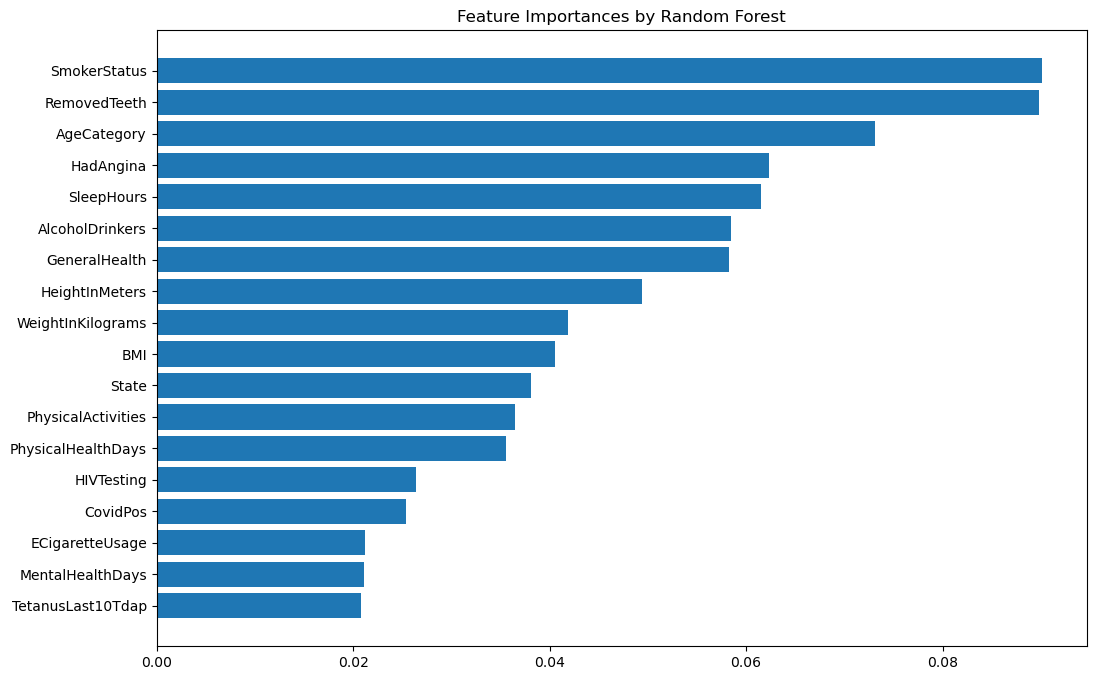

In [23]:
# pick the important features
importances = random_forest.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

threshold = 0.02  
important_features = feature_importances[feature_importances['Importance'] > threshold]
print(important_features)


plt.figure(figsize=(12, 8))
plt.title("Feature Importances by Random Forest")
plt.barh(important_features['Feature'], important_features['Importance'], align='center')
plt.gca().invert_yaxis()  



Based on the CDC's identification of key heart disease risk factors, the feature importance analysis aligns closely with these known contributors, such as smoking, age, and general health. The SmokerStatus variable (importance: 0.090) was revealed to be the most significant predictor in the model, consistent with the CDC's warning that smoking is a major cause of heart disease. The model identifies AgeCategory, GeneralHealth, HadAngina, and AlcoholDrinkers as key predictors, reflecting well-established links to heart disease, such as the increased risk with age, poor overall health, and excessive alcohol consumption. (Centers for Disease Control and Prevention [CDC], 2024)

Although these features may not show the strongest linear correlation with heart disease in the heatmap, their non-linear relationships and interactions with other variables make them essential for prediction. This highlights the advantage of Random Forest, which can capture more complex, non-linear interactions between features that may not be evident through traditional correlation analysis.



### Feature importance Model

After evaluating feature importance, I selected features with an importance score greater than 0.02 for model refinement.

In [24]:
X_train_important = X_train[important_features['Feature']]
X_test_important = X_test[important_features['Feature']]

rf_important = RandomForestClassifier(random_state=42)
rf_important.fit(X_train_important, y_train)

RandomForestClassifier(random_state=42)

### Feature importance Model Evaluate

In [25]:
y_pred_important = rf_important.predict(X_test_important)
print(f"Accuracy: {accuracy_score(y_test, y_pred_important)}")
print(classification_report(y_test, y_pred_important))

Accuracy: 0.9555651099048745
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     46585
           1       0.95      0.96      0.96     46450

    accuracy                           0.96     93035
   macro avg       0.96      0.96      0.96     93035
weighted avg       0.96      0.96      0.96     93035



Selecting features with an importance score greater than 0.02, the model achieved an accuracy of 95.56%. Furthermore, both precision and recall for each class remained balanced at 0.95 to 0.96. The F1 score is also 0.96, indicating a strong ability to correctly classify both positive (heart disease) and negative cases.

Comparing the original model, which had an accuracy of 95.76%, the model with selected features performed slightly worse, with a 0.2% drop in accuracy. However, precision, recall, and F1-scores remained consistent across both models. The results indicate that the model with fewer features did not have a significant impact on overall performance. The selected important features are sufficient for making accurate predictions while reducing model complexity.



## XGboost Model

I used the XGBoost model with default parameters at first. The default parameters include features such as a learning rate of 0.3, max_depth of 6, and n_estimators of 100. Starting with default parameters allows for quick evaluation before any hyperparameter tuning.

In [26]:
# build XGBoost model
from xgboost import XGBClassifier
xgb_important = XGBClassifier(random_state=42)
xgb_important.fit(X_train_important, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### XGboost Model Evaluate

In [27]:
y_pred_important = xgb_important.predict(X_test_important)

print(f"Accuracy: {accuracy_score(y_test, y_pred_important)}")
print(classification_report(y_test, y_pred_important))

Accuracy: 0.9588541946579244
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     46585
           1       0.98      0.94      0.96     46450

    accuracy                           0.96     93035
   macro avg       0.96      0.96      0.96     93035
weighted avg       0.96      0.96      0.96     93035



The XGBoost model showed an accuracy rate of 95.89%. The precision for classifying heart disease was 0.98, indicating that 98% of positive cases were correctly identified. The recall for heart disease was 0.94, indicating that 94% of all actual positive cases were correctly identified.

For cases without heart disease (0), both precision and recall were high, at 0.94 and 0.98, respectively. The F1 scores for both classes were balanced at 0.96, indicating that the model performed well in terms of precision and recall across both classes.

## XGBoost Model Optimization

### Hyperparameter Tuning

In [28]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],        
    'n_estimators': [50, 100, 200],                 
    'min_child_weight': [1, 3, 5]                   
}

In [29]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=xgb_important, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=2)

# Perform the grid search
grid_search.fit(X_train_important, y_train)

# Print the best parameters and the best score
print("Best Hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END learning_rate=0.01, min_child_weight=1, n_estimators=50; total time=   1.6s
[CV] END learning_rate=0.01, min_child_weight=1, n_estimators=50; total time=   1.6s
[CV] END learning_rate=0.01, min_child_weight=1, n_estimators=50; total time=   1.5s
[CV] END learning_rate=0.01, min_child_weight=1, n_estimators=50; total time=   1.5s
[CV] END learning_rate=0.01, min_child_weight=1, n_estimators=50; total time=   1.6s
[CV] END learning_rate=0.01, min_child_weight=1, n_estimators=100; total time=   2.5s
[CV] END learning_rate=0.01, min_child_weight=1, n_estimators=100; total time=   2.4s
[CV] END learning_rate=0.01, min_child_weight=1, n_estimators=100; total time=   2.4s
[CV] END learning_rate=0.01, min_child_weight=1, n_estimators=100; total time=   2.4s
[CV] END learning_rate=0.01, min_child_weight=1, n_estimators=100; total time=   2.5s
[CV] END learning_rate=0.01, min_child_weight=1, n_estimators=200; total time=   4.

The grid search found the best hyperparameters for the XGBoost model to be a learning rate of 0.2, min_child_weight of 3, and 200 estimators.


## Best Parameters XGboost Model

In [30]:
# use the best parameters to build the model
best_xgb = XGBClassifier(**grid_search.best_params_, random_state=42)
best_xgb.fit(X_train_important, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Best Parameters XGboost Model Evaluate

In [31]:
best_xgb_pred = best_xgb.predict(X_test_important)
print(f"Accuracy: {accuracy_score(y_test, best_xgb_pred)}")
print(classification_report(y_test, best_xgb_pred))

Accuracy: 0.9604879883914655
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     46585
           1       0.98      0.94      0.96     46450

    accuracy                           0.96     93035
   macro avg       0.96      0.96      0.96     93035
weighted avg       0.96      0.96      0.96     93035



The model using the best parameters from the grid search had an accuracy of 96%, with a precision of 0.98 for predicting heart disease (1) and 0.94 for non-heart disease (0). The recall was similarly balanced, at 0.98 for non-heart disease and 0.94 for heart disease, leading to F1- scores of 0.96 for both classes. This indicates strong, consistent performance in identifying both positive and negative cases.

When compared to the original XGBoost model with default parameters (accuracy: 95.89%), the model with optimized hyperparameters performed slightly better. The improvement shows that tuning parameters such as learning rate, min_child_weight, and n_estimators helped refine the model's performance.

# Conclusion

This report used Random Forest and XGBoost model to predict heart disease based on a large dataset of health and demographic information. The analysis showed that XGBoost achieved the highest accuracy at 96.05%, while Random Forest provided a balanced trade-off between precision and recall, making it an optimal choice for healthcare applications. The feature importance analysis revealed that smoking status, age, and general health are the most critical factors in predicting heart disease. Future research could explore more additional data sources, such as genetic factors or patient history, to further improve the predictive power of these models. Additionally, the use of these models in clinical settings could enhance early diagnosis and optimize the allocation of medical resources.

In [ ]:
import joblib

# Save the XGBoost model
joblib.dump(best_xgb, 'xgboost_model.pkl')



NameError: name 'best_xgb' is not defined

In [1]:
import joblib
from xgboost import XGBClassifier

# 从 .pkl 文件加载模型
model = joblib.load('xgboost_model.pkl')

In [2]:
# 将模型保存为 JSON 格式
booster = model.get_booster()

# 保存为 .json 格式
booster.save_model('xgboost_model.json')

